### 4.2 Missing data: impact on base statistics & distribution analysis; methods to complete missing data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#### 1. Data Source:
- The Task 4.2 data source is a simple random sample of independent chi-squared (identically) distributed random variables
- $X \equiv Exp(\lambda), \lambda = 0.7$

##### 2. Research purpose:

1. Show impact of missing data on base statistics
2. Perform distribution analysis on a regular dataset vs a dataset with missing data (that impacts base statictics on a high signifficance level); Compare the results
3. Describe most common methods used to complete missing data

##### 3. Model definition:
Model: $(X,\{P_{n}, n \in N\})$:
   - X = $[ 0, +\infty)$
   - $n = 3$; $N = \mathbb{N}$
   - $P_{n} \equiv \chi^2\space(n)$

In [129]:
n = 3

In [130]:
def X(k):
    global n
    return chi2.rvs(n,size=k)

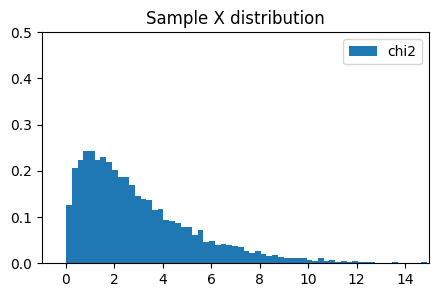

mean = 3.0254884286049815
var = 6.007971916210981


In [175]:
n = 3
size=10000
sample=X(size)
def distribution_hist(sample):
    plt.hist(sample,bins=80,density=True,label="chi2")
    plt.xlim((-1,15))
    plt.ylim((0,0.5))
    plt.legend()
    plt.title("Sample X distribution")
    plt.gcf().set_size_inches((5,3))
    plt.show()

    print("mean =",sample.mean())
    print("var =",sample.std()**2)
distribution_hist(sample)

In [176]:
def corrupt_data(sample,fun):
    #fun = function of sample & element index
    return np.array([fun(sample,i) for i in range(len(sample))],dtype=float)

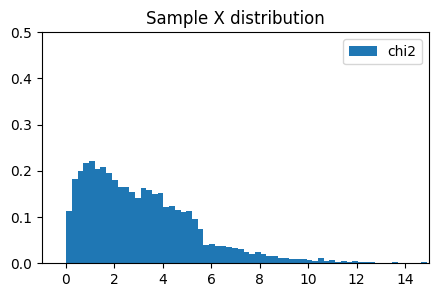

mean = 3.1563505362765736
var = 5.625343083337859


In [179]:
from random import random
#replace every 10th element with random noise
replace_mod10_with_random_noise=lambda sample,i: sample[i] if i%10!=0 else sample.mean()+abs(random())*sample.std()

samp1=corrupt_data(sample,replace_mod10_with_random_noise) 
distribution_hist(samp1)

In [148]:
samp1.

SyntaxError: invalid syntax (2022905617.py, line 1)